Представьте, что вы работаете аналитиком в очень крупной компании по доставке пиццы над приложением для курьеров (да, обычно в таких компаниях есть приложение для курьеров и отдельно приложение для потребителей).

У вас есть несколько ресторанов в разных частях города и целый штат курьеров. Но есть одна проблема, к вечеру скорость доставки падает из-за того, что курьеры уходят домой после рабочего дня, а количество заказов лишь растет. Это приводит к тому, что в момент пересмены наша доставка очень сильно проседает в эффективности. 

Наши data scientist-ы придумали новый алгоритм, который позволяет курьерам запланировать свои последние заказы перед окончанием рабочего дня так, чтобы их маршрут доставки совпадал с маршрутом до дома. То есть, чтобы курьеры доставляли последние свои заказы за день как бы "по пути" домой. 

Вы вместе с командой решили раскатить A/B тест на две равные группы курьеров. Часть курьеров использует старый алгоритм без опции "по пути", другие видят в своем приложении эту опцию и могут ее выбрать. Ваша задача – проанализировать данные эксперимента и помочь бизнесу принять решение о раскатке новой фичи на всех курьеров.

Данные https://stepik.org/media/attachments/lesson/385916/experiment_lesson_4.csv   

Описание данных
- order_id - id заказа
- delivery_time - время доставки в минутах
- district - район доставки
- experiment_group - экспериментальная группа

1. **Для начала давайте сформулируем гипотезы для проверки. Выберите гипотезы, которые мы сможем проверить в этом эксперименте:**
Выберите все подходящие ответы из списка

    Альтернативная гипотеза (H1): Разницы между средним временем доставки в тестовой и контрольной нет
    **Нулевая гипотеза (H0): Разницы между средним временем доставки в тестовой и контрольной группе нет**

    Нулевая гипотеза (H0): Разница между средним временем доставки в тестовой и контрольной группе есть

    Альтернативная гипотеза (H1): Изменение алгоритма влияет на скорость доставки

    Нулевая гипотеза (H0): Изменение алгоритма не влияет на скорость доставки

    **Альтернативная гипотеза (H1): Разница между средним временем доставки в тестовой и контрольной группе есть**


In [13]:
#загузка используемых библиотек
import pandas as pd
import numpy as np
import scipy 
import seaborn as sns
from scipy import stats
%matplotlib inline

url = 'https://stepik.org/media/attachments/lesson/385916/experiment_lesson_4.csv'
df = pd.read_csv(url)
df.head(10)

,order_id,delivery_time,district,experiment_group
0,3159,44.0,Purlieus,control
1,10426,51.0,Purlieus,control
2,9155,46.0,Purlieus,control
3,10699,34.0,Purlieus,control
4,10061,43.0,Purlieus,control
5,5535,38.0,Purlieus,control
6,5793,43.0,Purlieus,control
7,3756,36.0,Purlieus,control
8,3394,57.0,Purlieus,control
9,1937,48.0,Purlieus,control


2. Сопоставьте графики распределения и  экспериментальные группы:

district
Central     AxesSubplot(0.125,0.125;0.775x0.755)
Purlieus    AxesSubplot(0.125,0.125;0.775x0.755)
Suburb      AxesSubplot(0.125,0.125;0.775x0.755)
Name: delivery_time, dtype: object

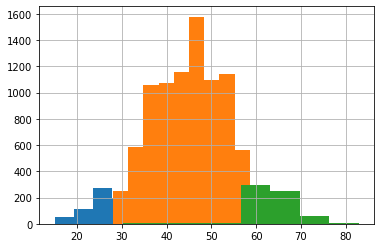

In [14]:
df.query('experiment_group == "control"').groupby('district').delivery_time.hist()

district
Central     AxesSubplot(0.125,0.125;0.775x0.755)
Purlieus    AxesSubplot(0.125,0.125;0.775x0.755)
Suburb      AxesSubplot(0.125,0.125;0.775x0.755)
Name: delivery_time, dtype: object

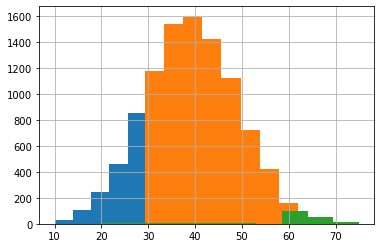

In [15]:
df.query('experiment_group == "test"').groupby('district').delivery_time.hist()

3. Посчитайте количество наблюдений в тестовой и контрольной группе.   
На сколько по модулю отличается количество наблюдений в тесте и контроле?  

In [16]:
cnt = df.groupby('experiment_group').order_id.count()
print(cnt)
print(cnt[1] - cnt[0])

experiment_group
control    10092
test       10104
Name: order_id, dtype: int64
12


4. Теперь давайте изучим наши распределения.   
Проверим выполнение условий на нормальность и посчитаем стандартное отклонение в тесте и в контроле.  

Обязательно сделайте семплирование перед применением критерия при проверке на нормальность (и для теста, и для контроля),   
так как на больших выборках вы можете получать неверные результаты:   

experiment[experiment['experiment_group'] == 'test']['delivery_time'].sample(1000, random_state=17)  
Заполните пропуски ниже:

In [24]:
# Берем не всю выборку, а 1000 значений из нее, если наше распределение нормальное, то и выборка будет нормальной
# random_state=17 позволяет сделать наши результаты более стабильными
stats.shapiro(df.query('experiment_group  == "test"').delivery_time.sample(1000, random_state=17))

(0.9975479245185852, 0.14013493061065674)

In [18]:
stats.shapiro(df.query('experiment_group  == "control"').delivery_time.sample(1000, random_state=17))

(0.9974725842475891, 0.12411931157112122)

In [19]:
round(df.query('experiment_group  == "test"').delivery_time.std(), 2)

9.88

In [20]:
round(df.query('experiment_group  == "control"').delivery_time.std(), 2)

9.99

In [25]:
print("Для того, чтобы проверить нормальность распределения я использую Shapiro-Wilk test.")
print('Этот тест показывает, что значения в тестовой группе распределены нормально')
print('B контрольной группе распределение является нормальным')
print('Стандартное отклонение времени доставки в тесте равно (округлите до сотых) = 9.88')
print(' Стандартное отклонение времени доставки в контроле равно (округлите до сотых) = 9.99')

Для того, чтобы проверить нормальность распределения я использую Shapiro-Wilk test.
Этот тест показывает, что значения в тестовой группе распределены нормально
B контрольной группе распределение является нормальным
Стандартное отклонение времени доставки в тесте равно (округлите до сотых) = 9.88
 Стандартное отклонение времени доставки в контроле равно (округлите до сотых) = 9.99


5. 
Пришло время сравнить средние в тесте и контроле.  
Внимание: здесь уже не нужно пользоваться методом .sample() - он нам нужен был только для теста Шапиро-Уилка,   
остальные тесты надо проводить на полных данных.   


In [26]:
scipy.stats.ttest_ind(df.query('experiment_group == "test"').delivery_time ,\
                      df.query('experiment_group == "control"').delivery_time )

Ttest_indResult(statistic=-43.03582663183714, pvalue=0.0)

In [27]:
print('Для сравнения средних в данных экспериментальных группах я использую Student t-test.')
print('Статистика в тесте равна (округлите до целого) -43 p-value <= 0.05')

Для сравнения средних в данных экспериментальных группах я использую Student t-test.
Статистика в тесте равна (округлите до целого) -43 p-value <= 0.05


6. На сколько процентов изменилось среднее время доставки в тестовой группе (округлите до сотых)? 


In [22]:
test_mean  = df.query('experiment_group == "test"').delivery_time.mean()
control_mean  = df.query('experiment_group == "control"').delivery_time.mean()
perc = (test_mean - control_mean)/control_mean * 100
round(perc, 2)

-13.35

7. Что в итоге? Катим?   
    Да, раскатываем новый алгоритм на всех, так как среднее время доставки статистически значимо изменилось. Среднее время доставки в тесте больше, чем в контроле.

    **Да, раскатываем новый алгоритм на всех, так как среднее время доставки статистически значимо изменилось. Среднее время доставки в тесте меньше, чем в контроле.**

    Да, раскатываем на всех, новый алгоритм напрямую влияет на скорость доставки.

    Не катим, так как среднее время доставки статистически значимо не изменилось.